In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter

import numpy as np
import csv
from collections import namedtuple
from typing import NamedTuple

In [2]:
class ROW(NamedTuple):
    k: int
    t: int
    v: int
    cca: int
    original: int
    zip: int

In [3]:
rows = []
with open('C:/Users/Petru/projects/csharp/CA2/result.csv') as file:
    reader = csv.DictReader(file)
    for row in reader:
        real_row = ROW(
            t=int(row['T']),
            v=int(row['V']),
            k=int(row['K']),
            cca=int(row['cca-new']),
            zip=int(row['zip']),
            original=int(row['original-file-length']),
        )
        rows.append(real_row)

In [4]:
data = [x for x in rows if x.t == 2 and x.v == 2]
data.sort(key=lambda row: row.k)

In [5]:
k = [row.k for row in data]
cca = [row.cca for row in data]
zip_data = [row.zip for row in data]
original = [row.original for row in data]
ratio_original_cca = [row.original / row.cca for row in data]
ratio_original_zip = [row.original / row.zip for row in data]
ratio_zip_cca = [row.zip / row.cca for row in data]

In [6]:
def plot_cca_vs_zip(rows, v, t, ax):
    data = [row for row in rows if row.t == t and row.v == v]
    data.sort(key=lambda row: row.k)
    k = [row.k for row in data]
    cca = [row.cca for row in data]
    zip_data = [row.zip for row in data]
    ax.plot(k, zip_data, label='zip')
    ax.plot(k, cca, label='cca')
    ax.legend()
    ax.set_title(f'$V={v}$')

In [7]:

def plot_ratio_original_to_compressed(rows, v, t, ax):
    data = [row for row in rows if row.t == t and row.v == v]
    data.sort(key=lambda row: row.k)
    k = [row.k for row in data]
    ratio_original_cca = [row.original / row.cca for row in data]
    ratio_original_zip = [row.original / row.zip for row in data]
    ax.plot(k, ratio_original_cca, label='cca')
    ax.plot(k, ratio_original_zip, label='zip')
    ax.legend()
    ax.set_title(f'$V={v}$')

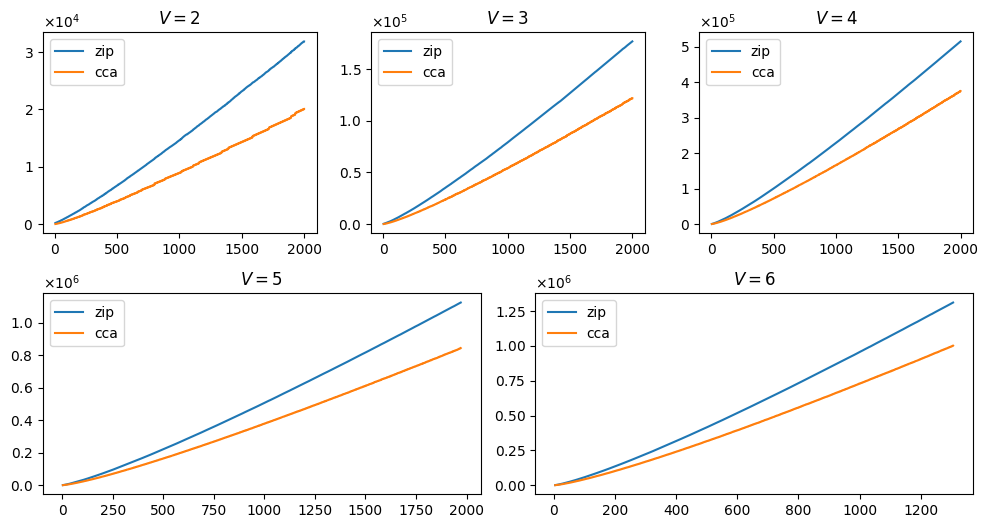

In [8]:
fig= plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 6, figure=fig, wspace=0.5, hspace=0.3)
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:])
ax4 = fig.add_subplot(gs[1, :3])
ax5 = fig.add_subplot(gs[1, 3:])
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-1, 1))
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_major_formatter(formatter)
ax4.yaxis.set_major_formatter(formatter)
ax5.yaxis.set_major_formatter(formatter)

t = 3
plot_cca_vs_zip(rows, 2, t, ax1)
plot_cca_vs_zip(rows, 3, t, ax2)
plot_cca_vs_zip(rows, 4, t, ax3)
plot_cca_vs_zip(rows, 5, t, ax4)
plot_cca_vs_zip(rows, 6, t, ax5)

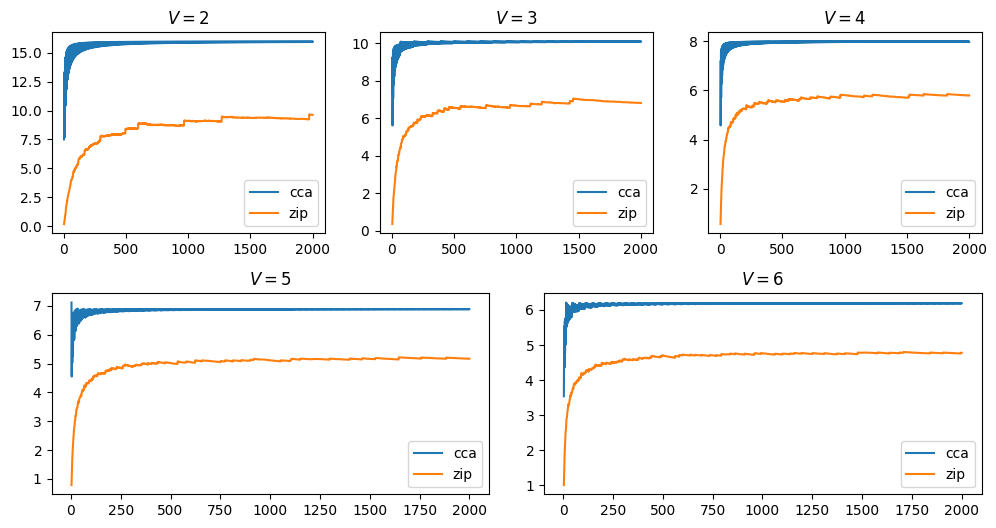

In [9]:
fig= plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 6, figure=fig, wspace=0.5, hspace=0.3)
ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:])
ax4 = fig.add_subplot(gs[1, :3])
ax5 = fig.add_subplot(gs[1, 3:])
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-1, 1))
ax1.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_major_formatter(formatter)
ax4.yaxis.set_major_formatter(formatter)
ax5.yaxis.set_major_formatter(formatter)

t = 2
plot_ratio_original_to_compressed(rows, 2, t, ax1)
plot_ratio_original_to_compressed(rows, 3, t, ax2)
plot_ratio_original_to_compressed(rows, 4, t, ax3)
plot_ratio_original_to_compressed(rows, 5, t, ax4)
plot_ratio_original_to_compressed(rows, 6, t, ax5)